## CAPSTONE

# Data analysis road map


1. Load in the data
2. Clean data
    - Check for nulls
    - Unpack any
3. 

In [4]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm as tqdm


In [6]:
review_data = []
for line in open('Movies_and_TV.json','r'):
    review_data.append(json.loads(line))


KeyboardInterrupt: 

In [3]:
review_data[0]

{'overall': 5.0,
 'vote': '9',
 'verified': False,
 'reviewTime': '11 8, 2001',
 'reviewerID': 'AH2IFH762VY5U',
 'asin': 'B00005N7P0',
 'reviewerName': 'ted sedlmayr',
 'reviewText': 'for computer enthusiast, MaxPC is a welcome sight in your mailbox. i can remember for years savorying every page of "boot" (as it was called in beginning) as i was (and still am) obcessed with PC\'s. Anyone, from advanced users - to beginners looking for knowledge - can profit from every issue of MaxPC. the icing on the cake is the subscription that comes with a CD-ROM as it is packed with demos, utilities, and other useful apps (very helpful for those not blessed with broadband connections). Until I discovered the community of hardware enthusiast web sites, MaxPC, formerly "boot", was my only really informative source for computing news and articles. To this day, i consider my subscription to it worth more than 10 subscriptions to most other computing mags. I can\'t wait until they merge with DVD media a

In [4]:
len(review_data)

89689

In [5]:
review_df = pd.DataFrame(review_data)

In [6]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89689 entries, 0 to 89688
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         89689 non-null  float64
 1   vote            24103 non-null  object 
 2   verified        89689 non-null  bool   
 3   reviewTime      89689 non-null  object 
 4   reviewerID      89689 non-null  object 
 5   asin            89689 non-null  object 
 6   reviewerName    89687 non-null  object 
 7   reviewText      89656 non-null  object 
 8   summary         89670 non-null  object 
 9   unixReviewTime  89689 non-null  int64  
 10  style           51398 non-null  object 
 11  image           135 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 7.6+ MB


In [7]:
review_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,5.0,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,NaN
1,5.0,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,NaN,NaN
2,3.0,14,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",1174694400,{'Format:': ' Print Magazine'},NaN
3,5.0,13,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,1163116800,{'Format:': ' Print Magazine'},NaN
4,5.0,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,NaN,NaN


In [8]:
review_df.isnull().sum()

overall               0
vote              65586
verified              0
reviewTime            0
reviewerID            0
asin                  0
reviewerName          2
reviewText           33
summary              19
unixReviewTime        0
style             38291
image             89554
dtype: int64

create a clean dataframe to store only numeric values.

In [9]:
clean_df = review_df[['overall','unixReviewTime']].copy()

# Check the created dataframe
clean_df.head()

,overall,unixReviewTime
0,5.0,1005177600
1,5.0,1004486400
2,3.0,1174694400
3,5.0,1163116800
4,5.0,1405296000


There are 65586 NaN values in vote, change all NaN values to 0 and add to the clean_df

In [10]:
clean_df['vote'] = review_df['vote'].replace(',','',regex=True)

clean_df['vote'] = clean_df['vote'].fillna(0).astype('int')

#

In [11]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89689 entries, 0 to 89688
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         89689 non-null  float64
 1   unixReviewTime  89689 non-null  int64  
 2   vote            89689 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 2.1 MB


Check values in the clean_df

In [12]:

print(clean_df.isnull().sum())

clean_df

overall           0
unixReviewTime    0
vote              0
dtype: int64


,overall,unixReviewTime,vote
0,5.0,1005177600,9
1,5.0,1004486400,9
2,3.0,1174694400,14
3,5.0,1163116800,13
4,5.0,1405296000,0
...,...,...,...
89684,5.0,1471305600,0
89685,1.0,1470787200,0
89686,5.0,1469923200,0
89687,5.0,1507161600,0


**Check values in the verified column and convert to numeric**

In [13]:
review_df['verified'].value_counts()

True     58654
False    31035
Name: verified, dtype: int64

In [14]:
# Map true to 1 and false to 0
clean_df['verified'] = review_df['verified'].map({True:1,False:0})

# check the added column
clean_df


,overall,unixReviewTime,vote,verified
0,5.0,1005177600,9,0
1,5.0,1004486400,9,0
2,3.0,1174694400,14,0
3,5.0,1163116800,13,0
4,5.0,1405296000,0,1
...,...,...,...,...
89684,5.0,1471305600,0,1
89685,1.0,1470787200,0,1
89686,5.0,1469923200,0,1
89687,5.0,1507161600,0,1


Check the amount of different reviewers

In [15]:
review_df['reviewerName'].value_counts()

Amazon Customer        4833
Kindle Customer        1053
Linda                    94
Susan                    67
Mike                     64
                       ... 
M. Kiser                  1
John A. Fugel             1
Lawrence J. Marotta       1
ATK                       1
Anthony M Asci            1
Name: reviewerName, Length: 58399, dtype: int64

In [16]:
review_df['reviewerID'].value_counts()

A3JPFWKS83R49V    55
A2OTUWUSH49XIN    26
AEMZRE6QYVQBS     25
A3GA09FYFKL4EY    24
A30H2335OM7RD6    22
                  ..
A1GOGNVAM9CWRK     1
A5RXVI67FLKMD      1
AGXYE9WZZ4DUG      1
ATYDFYTB5URNC      1
A1N6M7HRWMDE3D     1
Name: reviewerID, Length: 72098, dtype: int64

The `reviewerID` and `reviewerName` column show differrent lengths. The `reviewerName` column contains less information than the `reviewerID` column because users can have the same names but reviewerID is unique. Thus reviewerID should be used.

Convert the reviewerName column to a numeric representation using `pd.factorize`

In [17]:
clean_df['reviewer_ID'] = pd.factorize(review_df['reviewerID'])[0]

In [18]:
# clean_df['reviewerName']= review_df['reviewerName']

Do the same for the product column (ASIN)

In [19]:
#clean_df['itemID'] = pd.factorize(review_df['asin'])[0]

In [20]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89689 entries, 0 to 89688
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         89689 non-null  float64
 1   unixReviewTime  89689 non-null  int64  
 2   vote            89689 non-null  int64  
 3   verified        89689 non-null  int64  
 4   reviewer_ID     89689 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.4 MB


There are 5804 different review dates

Show correlations between different features

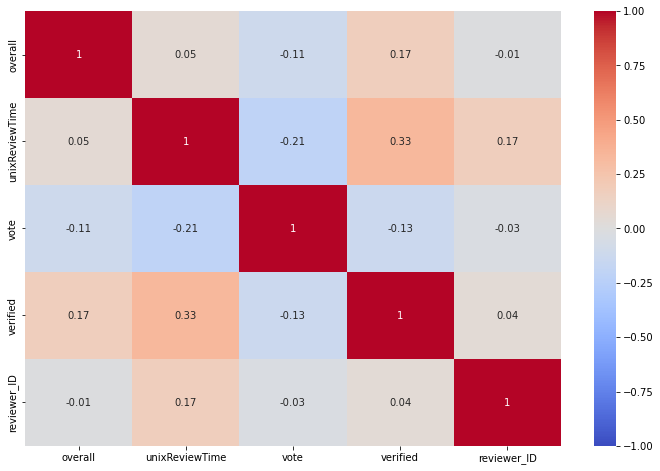

In [21]:
plt.figure(figsize= [12,8])
sns.heatmap(clean_df.corr().round(2), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

Check the number of unique products in the database

In [26]:
clean_df['item_id'] = review_df['asin']

**Read in the clean meta data and combine it with the clean review data**

In [27]:
meta_df = pd.read_csv('clean_meta.csv')
meta_df

,brand,rank,asin,description,category_1,category_2,category_3,category_4
0,Reason Magazine,NaN,B00005N7NQ,REASON is edited for people interested in econ...,Professional & Educational Journals,Professional & Trade,Humanities & Social Sciences,Economics & Economic Theory
1,String Letter Publishers,742,B00005N7OC,Written by and for musicians. Covers a variety...,"Arts, Music &amp; Photography",Music,NaN,NaN
2,Conde Nast Publications,NaN,B00005N7OD,Allure is the beauty expert. Every issue is fu...,Fashion &amp; Style,Women,NaN,NaN
3,AirAge Publishing,NaN,B00005N7O9,FLIGHT JOURNAL includes articles on aviation h...,"Sports, Recreation & Outdoors",Sports & Leisure,Flying,NaN
4,EPG Media & Specialty Information,NaN,B00005N7O6,RIDER is published for the road and street rid...,Professional & Educational Journals,Professional & Trade,Transportation,NaN
...,...,...,...,...,...,...,...,...
2315,TI Golf Holdings,NaN,B01HI8V19K,"The game's most widely read publication, GOLF ...",NaN,NaN,NaN,NaN
2316,"Motorsport Marketing, Inc.",NaN,B01HI8V1I6,"Built for the true classic car enthusiast, eac...","Sports, Recreation & Outdoors",Sports & Leisure,Extreme Sports,NaN
2317,Meredith Corporation,NaN,B01HI8V0ZK,InStyle celebrates the private side of public ...,Fashion & Style,NaN,NaN,NaN
2318,Meredith Corporation,NaN,B01HI8V1C2,Sports Illustrated brings you spectacular acti...,NaN,NaN,NaN,NaN


In [29]:
new_df = pd.merge(clean_df, meta_df,  how='left', left_on='item_id', right_on = 'asin')

In [31]:
new_df.head()

,overall,unixReviewTime,vote,verified,reviewer_ID,item_id,brand,rank,asin,description,category_1,category_2,category_3,category_4
0,5.0,1005177600,9,0,0,B00005N7P0,"Future US, Inc.",NaN,B00005N7P0,MAXIMUM PC is the ultimate upgrade for the sav...,Technology,Computers &amp; Internet,NaN,NaN
1,5.0,1004486400,9,0,1,B00005N7P0,"Future US, Inc.",NaN,B00005N7P0,MAXIMUM PC is the ultimate upgrade for the sav...,Technology,Computers &amp; Internet,NaN,NaN
2,3.0,1174694400,14,0,2,B00005N7OJ,Brant Publications,406,B00005N7OJ,The Magazine Antiques brings you the fascinati...,Home & Garden,Antiques & Collectibles,NaN,NaN
3,5.0,1163116800,13,0,3,B00005N7OJ,Brant Publications,406,B00005N7OJ,The Magazine Antiques brings you the fascinati...,Home & Garden,Antiques & Collectibles,NaN,NaN
4,5.0,1405296000,0,1,4,B00005N7P0,"Future US, Inc.",NaN,B00005N7P0,MAXIMUM PC is the ultimate upgrade for the sav...,Technology,Computers &amp; Internet,NaN,NaN


In [33]:
new_df['brand'].value_counts().head(10)


Hearst Magazines                    13788
Meredith Corporation                 6941
Meredith                             4911
Conde Nast Publications              3638
National Geographic Partners LLC     3163
Trusted Media Brands, Inc            2984
Bonnier Corporation                  2774
Conde Nast                           2591
Active Interest Media                1962
American Media, Inc.                 1507
Name: brand, dtype: int64